---

## Miscellaneous Circuits

_course: quantum cryptography for beginners
<br>date: 12 december 2024
<br>author: burton rosenberg_

---


In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')

import math
import numpy as np
import matplotlib.pyplot as plt



qiskit version: 1.1.2



### Additional Constructions

A double controlled $H$ gate can be done the same as the above constrution. Also, using the construction with three inputs, with three square root and an inverse square root controled by the parity of the three bits, gives a X controled by the majority.


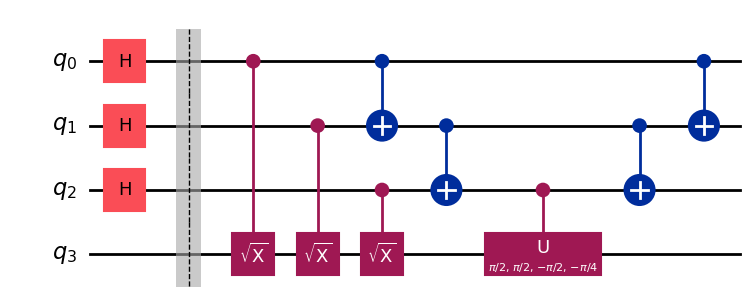

<IPython.core.display.Latex object>

In [2]:
def majority_X(qc):

    qc.csx(0,3)
    qc.csx(1,3)
    qc.csx(2,3)
    qc.cx(0,1)
    qc.cx(1,2)
    qc.cu(np.pi/2, np.pi/2, -np.pi/2, -np.pi/4, 2, 3)
    qc.cx(1,2)
    qc.cx(0,1)
    return qc

qc = QuantumCircuit(4)
for i in range(3):
    qc.h(i)
qc.barrier()
qc = majority_X(qc)
display(qc.draw('mpl'))
display(Statevector(qc).draw('latex'))

### Phase Kickback

Is there something for two qubits?
$$
|x,0\rangle\mapsto (i)^{F(x)}|x,0\rangle
$$


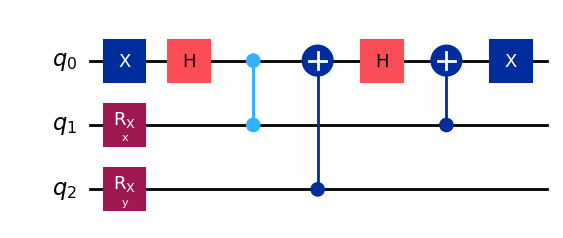

None

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
x = Parameter('x')
y = Parameter('y')

qc = QuantumCircuit(3)
qc.rx(x,1)
qc.rx(y,2)
qc.x(0)
qc.h(0)
qc.cz(1,0)
qc.cx(2,0)
qc.h(0)
qc.cx(1,0)
qc.x(0)

#op = Operator(qc)
#display(op.draw('latex'))
display(display(qc.draw('mpl')))

params = [
    {x:0, y:0},
    {x:math.pi, y:0},
    {x:0, y:math.pi},
    {x:math.pi, y:math.pi}
]

basic_sim = BasicSimulator()
for param in params:
    sv = Statevector(qc.assign_parameters(param))
    display(sv.draw('latex'))
